<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [1]:
# SETUP

import numpy as np
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', DeprecationWarning)

# Useful for probability calculations
from scipy import stats
from scipy import special

In [2]:
# Standard deck of cards

ranks = np.append(np.arange(2, 11), np.array(['Jack', 'Queen', 'King', 'Ace']))

suits = ['\u2660', '\u2663', '\u2661', '\u2662']

deck = Table().values('Suit', suits, 'Rank', ranks).move_to_start('Rank')

# Lab 1: Simple Random Samples #

Welcome to labs in Prob 140! As this is the first lab you are doing after the long summer break, it is relatively short and takes you just a bit further than the text does.  

Simple random sampling (sampling uniformly at random without replacement) is a natural scheme for sampling from a finite population. Data science applications aside, simple random sampling happens every time a hand of cards is dealt from a well shuffled deck. In this lab we will study aspects of simple random sampling in the context of cards. 

The discoveries you will make have obvious generalizations when the parameters are different. So the lab isn't just about cards, but cards are the primary setting. Throughout the course you will see similar calculations used in different contexts.

More generally, the lab is an exploration of probability distributions and how to work with them. That is going to be the basis of the course.

What you'll do in this lab:
- Use SciPy to find numbers of combinations and hypergeometric probabilities
- Study the distribution of the count of a specified rank in a hand
- Study the joint distribution of the counts of two specified suits in a hand

*Note:* Similar to homework, labs have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

## Part 1: Counting Hands ##
We will start with some functions that make numerical probability calculations easy. `SciPy` is a system for scientific computing, based on Python. Its modules `special` and `stats` are useful for math and probability calculations.

### Number of Combinations ###
You know that if you have a population of size $N$ and you take a simple random sample of size $n$, then there are ${N \choose n}$ possible samples. 

For integers $0 \le n \le N$, `special.comb(N, n)` evaluates to ${N \choose n}$. 

But sometimes you get a float instead of an integer, due to the method of computation.

If you are bothered by the decimals you can use `special.comb(N, n, exact=True)` for the integer value.

Combinatorial terms can get large very quickly, but in this lab you won't have to worry about that.

In [3]:
special.comb(6, 2), special.comb(300, 5), special.comb(300, 5, exact=True)

(15.0, 19582837560.0, 19582837560)

### Standard Deck ###

In a standard deck of 52 cards, each card has three attributes – suit, color, and rank.
- There are 26 black cards, and 26 red cards which we show here as colorless.
- There are 13 cards in each of four suits: hearts ($\heartsuit$) and diamonds ($\diamondsuit$) are red, and spades ($\spadesuit$) and clubs ($\clubsuit$) are black.
- Within each suit, the 13 cards are ranked 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, King, Ace in ascending order of value.

The table `deck` is a visualization of a standard deck, one card per row. The spades are displayed below.

In [4]:
deck.show(13)

Rank,Suit
2,♠
3,♠
4,♠
5,♠
6,♠
7,♠
8,♠
9,♠
10,♠
Jack,♠


A 5-card poker hand, which we will simply call a poker hand, is a simple random sample of 5 cards dealt from a standard deck

In each cell, use `special.comb`, the integers 0 through 52, and the basic arithmetic operations `+`, `-`, `*`, and `/` to find the counts described. 

### 1a) Total Number of Hands ###

Find the total number of poker hands

In [5]:
num_poker_hands = special.comb(52, 5)

num_poker_hands

2598960.0

### 1b) Four of a Kind ###

Complete the cell below to find the number of poker hands that contain all four cards of any rank. This kind of hand is called "four of a kind" and the set of five cards is denoted $\{a, a, a, a, b\}$.

Notice a very important combinatorial technique: start by specifying which rank appears four times, and then introduce the number of ways in which that rank can be specified.

In [27]:
# num_poker_4_kings = number of poker hands that have all four kings
# num_poker_4_of_a_kind = number of hands that are four of a kind

num_poker_4_kings = special.comb(4,4) * special.comb(4,1) * special.comb(12,1)
#only 1 king in each set of 13 cards thus 4 choose 4, 12 remaining cards in each of 4 sets to choose from for after 4 kings
num_poker_4_of_a_kind = 13 * num_poker_4_kings
#Since we are looking at not just kings, we have a total of 13 possible card ranks to choose from

num_poker_4_of_a_kind, num_poker_hands

(624.0, 2598960.0)

### 1c) Full House ###

A "full house" is a hand that contains three cards of one rank and two of another: $\{a, a, a, b, b\}$.

As before, we will start with specific ranks. So let $n$ be the number of hands that contain 3 queens and 2 aces. Pick the correct option and explain your choice in the Markdown cell below.

The number of "full house hands" is equal to

(i) $\binom{13}{2} n$
$~~~~~~~~~~~~~$
(ii) $13 \times 12 \times n$

(ii) because the number of hands that contain 3 queens and 2 aces is just one of the combinations of a's and b's out of the $13 \times 12$ possible choices. Thus, to find the total number of 'full house hands' in a deck of 52 cards with 4 sets and 13 ranks in each, we must multiply the number of hands, n, for any one combination of a's and b's(in this case 3 queens and 2 aces) by the total number of possible a's and b's. 

It cannot be (i) because we cannot use a combination in this case, as the order of a and b matters, since having 3 queens and 2 aces is different from 3 aces and 2 queens.

Now complete the cell below to find the number of "full house" hands.

In [26]:
# num_poker_3_queens_2_aces = number of hands that have 3 queens and 2 aces
# num_poker_full_house = number of "full house" hands

num_poker_3_kings_2_queens = special.comb(4, 3) * special.comb(4, 2)
num_poker_full_house = 13 * 12 * num_poker_3_kings_2_queens

num_poker_full_house, num_poker_hands

(3744.0, 2598960.0)

### 1d) [ON PAPER] Two Pair ###

A hand of the form $\{ a, a, b, b, c\}$ is called "two pair." 

Use the methods developed in **1b** and **1c** to find the total number of "two pair hands" and **explain all the pieces** of your formula.

### 1e) Two Pair, continued ###

Now use the code cell to write an expression that evaluates to the number of "two pair" hands.

In [30]:
#num_poker_2_kings_2_queens = number of hands that have 2 kings and 2 queens
#num_poker_two_pair = number of "two pair" hands

num_poker_2_kings_2_queens = special.comb(4, 2)**2 * 44
num_poker_two_pair = special.comb(13, 2) * num_poker_2_kings_2_queens

num_poker_two_pair, num_poker_hands

(123552.0, 2598960.0)

## Part 2: Hypergeometric Probabilities ##
Because of the simple random sampling scheme, all ${N \choose n}$ possible samples are equally likely. Suppose that among the $N$ elements of the population, $G$ are good according to some precise definition of "good". Then you know that

$$
P(k \text{ good elements in the sample}) ~ = ~ 
\frac{ {G \choose k}{{N-G} \choose {n-k}} }{ {N \choose n} }
$$

following the standard interpretation that "$k$ good elements" means "exactly $k$ good elements."

These are impressively called *hypergeometric probabilities* because the terms are related to the hypergeometric series of mathematics. Scary terminology notwithstanding, what is being calculated is straightforward: the chance of getting a specified number of good elements in a simple random sample.

In the calculation above, $k$ is the desired number of good elements specified in the event. The *parameters*, or constants of the sampling scheme, are

- the population size $N$
- the population count of good elements $G$
- the simple random sample size $n$

`stats.hypergeom.pmf(k, N, G, n)` evaluates to the probability displayed above. The `pmf` part stands for "probability mass function".

**Warning**: Be careful when you read `SciPy` documentation for `hypergeom`. Their notation uses some of the same letters as we are using, to mean different things. It can therefore be horribly confusing. 

Just remember the call as:

`stats.hypergeom.pmf(k, population_size, num_good_in_population, sample_size)`

#### Hypergeometric Distributions ####
If $X$ is the number of good elements in the sample, then $P(X = k)$ is the hypergeometric probability above, and $X$ is said to have the *hypergeometric distribution with parameters $N$, $G$, and $n$.* When you see that, you should say in your head, "$X$ is the number of good elements in a simple random sample with the listed parameters."

By passing in a list or array for `k` instead of a single integer, you can get all the corresponding hypergeometric probabilities using the same call as above. The sampling scheme and hence the parameters stay fixed.

#### Example ####
Suppose a class has 100 students of whom 40 are seniors, and suppose you take a simple random sample of 25 students from the class. Then the chance that you get 10 seniors in the sample is

$$
\frac{ {{40} \choose {10}}{{60} \choose {15}} }{ {{100} \choose {25}} }
$$

which can be calculated in the two ways below.

In [3]:
special.comb(40, 10) * special.comb(60, 15) / special.comb(100, 25)

0.18592555463150046

In [4]:
stats.hypergeom.pmf(10, 100, 40, 25)

0.1859255546315013

If $X$ is the number of seniors in the sample, then $X$ has the hypergeometric distribution with parameters 100, 40, and 25. Here are all the probabilities in the distribution followed by a confirmation that it is indeed a distribution.

In [5]:
k = np.arange(26)
stats.hypergeom.pmf(k, 100, 40, 25)

array([2.14067270e-07, 5.94631305e-06, 7.52128246e-05, 5.76631655e-04,
       3.00883441e-03, 1.13733941e-02, 3.23633164e-02, 7.11112326e-02,
       1.22790908e-01, 1.68682459e-01, 1.85925555e-01, 1.65348813e-01,
       1.19027692e-01, 6.94328203e-02, 3.27933437e-02, 1.25051951e-02,
       3.83124849e-03, 9.36142164e-04, 1.80555721e-04, 2.71009562e-05,
       3.10429135e-06, 2.63970353e-07, 1.59982032e-08, 6.47603428e-10,
       1.55497998e-11, 1.65864532e-13])

In [6]:
sum(stats.hypergeom.pmf(k, 100, 40, 25))

0.9999999999999991

### 2a) Aces in a Bridge Hand ###

A hand in the game of bridge consists of a simple random sample of 13 cards dealt from a standard deck.

Suppose a bridge hand is dealt. Use `stats.hypergeom` to write expressions that evaluate to the probabilities below. Remember that "$n$ aces" means "exactly $n$ aces".

In [4]:
# ans_i = P(2 aces)
# ans_ii = P(at least one ace but not all the aces)

ans_i = stats.hypergeom.pmf(2, 52, 4, 13)
ans_ii = sum(stats.hypergeom.pmf(np.arange(1, 4), 52, 4, 13))

ans_i, ans_ii

(0.21349339735894468, 0.6935414165666287)

### 2b) Visualizing the Distribution ##
In this exercise you will visualize the distribution of the number of aces in a bridge hand.

The `prob140` library has methods that allow you to quickly draw a histogram of the probability distribution of an integer-valued random variable. For a random variable $X$ whose possible values are in `values_array` with the corresponding probabilities in the array `probs_array`, the assignment 

`dist_object = Table().values(values_array).probabilities(probs_array)`

creates a "distribution object" that we have named `dist_object`, containing the distribution of $X$. Then `Plot(dist_object)` draws the histogram.

Let $X$ be the number of aces in a bridge hand. Complete the cell below to draw the probability histogram of $X$. Make sure the histogram is consistent with your answers in **2a**.

Text(0.5, 1.0, 'Number of Aces in a Bridge Hand')

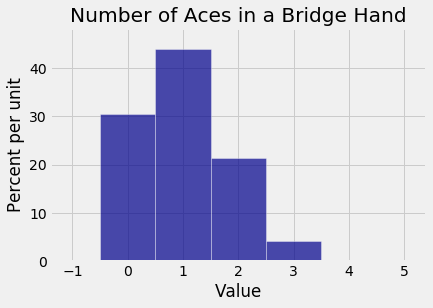

In [67]:
# Array of possible values of X
k = np.arange(5)

# Array/list of the corresponding probabilities
aces_probs = stats.hypergeom.pmf(k, 52, 4, 13)

# Distribution object consisting of the distribution of X
aces_dist = Table().values(k).probabilities(aces_probs)
Plot(aces_dist)

# Probability histogram of X
plt.title('Number of Aces in a Bridge Hand')

### 2c) Face Cards in a Bridge Hand ###
The *face* cards are those that have faces on them: the kings, the queens, and the jacks. So there are 12 face cards.

Use the cell below so that when it is run, the output is the probability histogram of the number of face cards in a bridge hand. Use as many lines of code as you need.

Text(0.5, 1.0, 'Number of Faces in a Bridge Hand')

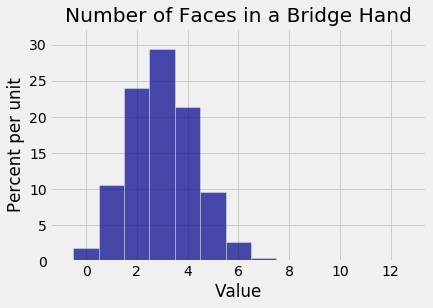

In [66]:
# Array of possible values of X
k = np.arange(13)

# Array/list of the corresponding probabilities
faces_probs = stats.hypergeom.pmf(k, 52, 12, 13)

# Distribution object consisting of the distribution of X
faces_dist = Table().values(k).probabilities(faces_probs)
Plot(faces_dist)

# Probability histogram of X
plt.title('Number of Faces in a Bridge Hand')

### 2d) Comparing the Distributions ###
The two distributions that you have plotted should look quite different. But understanding the differences is complicated because the scales on the axes of the two graphs are different. 

Overlaid histograms are easier to interpret. The call

`Plots(variable_name_1, dist_object_1, variable_name_2, dist_object_2)`

draws overlaid histograms of the two probability distributions in the arguments. Choose the strings `variable_name_1` and `variable_name_2` to be short but descriptive of the corresponding variables.

Write one line of code to overlay the histograms in **2b** and **2c**. Call one of the variables `Number of Aces` and the other variable `Number of Face Cards`.

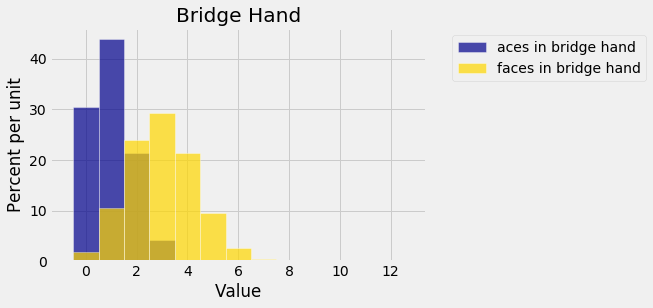

In [68]:
plt.title('Bridge Hand')
Plots('aces in bridge hand',aces_dist, 'faces in bridge hand', faces_dist )

We have been studying ranks, but suits are very important in bridge. We will look at suits in the next part of the lab. Before doing that, say (without calculation or graphing) which of the two histograms above more closely resembles the distribution of the number of hearts in a bridge hand? Explain your answer.

I believe that the histogram for 'faces in bridge hand' more closely resembles the distribution of the number of hearts in a bridge hand. This is because there are 13 heart cards in total in a standard deck, which is closer to the number of face cards, 12, then it is to the number of aces, 4, in a deck. Hence, the probability distribution of hearts in a bridge hand should more closely resemble the probability distribution of faces in a bridge hand then aces in a bridge hand.

## Part 3: Joint Distribution  ##
This part of the lab is a workout in joint distributions. The setting is the joint distribution of the counts of two suits in a bridge hand. We have used spades and hearts but the results apply to any pair of suits.

Let $S$ be the number of spades and $H$ the number of hearts in a bridge hand.

### 3a) [ON PAPER] Spades and Hearts ###

Find:
- all the possible values of the pair $(S, H)$
- $P(S = s, H = h)$ for each possible value $(s, h)$. Write out a general formula in terms of $s$ and $h$.

Make sure you don't include impossible pairs, as otherwise you might have trouble coding the joint distribution.

### 3b) Joint Distribution ###

Use your answers in **3a** to define a function `joint_prob` that takes arguments $s$ and $h$ and returns $P(S = s, H = h)$.

In [29]:
def joint_prob(s, h):
    if s+h <= 13:
        return (special.comb(13, s) * special.comb(13, h) * special.comb(26, 13-s-h))/ special.comb(52, 13)
    else:
        return 0

Think about what `joint_prob(7, 8)` should evaluate to and run the cell below to check that your function gets the right answer.

In [30]:
joint_prob(7, 8)

0

You know what the total of all the probabilities in the joint distribution of $S$ and $H$ should be. Use the cell below to confirm that the sum of `joint_prob(s, h)` over all `s` and `h` is indeed what it should be. There are many ways of writing the code; whichever you use, make sure that the last line evaluates to the sum.

In [32]:
total_probability = 0
S = np.arange(14)
H = np.arange(14)
for s in S:
    for h in H:
        total_probability += joint_prob(s, h)
print(total_probability)

1.0000000000000002


### 3c) Joint Distribution Table ###
[Section 4.1](http://prob140.org/textbook/Chapter_04/01_Joint_Distributions.html) of the textbook is going to be your source for the code needed below. The construction of the joint distribution table is essentially parallel to the construction of the distribution object of a single variable in Part 2 above. 

Scroll down Section 4.1 of the textbook till you see the first joint distribution table. Read the description of the code used to display the table, and then complete the cell below to display the joint distribution table of $S$ and $H$.

In [34]:
k = np.arange(14)
two_suits = Table().values('X', k , 'Y', k).probability_function(joint_prob)

two_suits

,X=0,X=1,X=2,X=3,X=4,X=5,X=6,X=7,X=8,X=9,X=10,X=11,X=12,X=13
Y=13,1.574770e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y=12,5.322721e-10,2.661360e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y=11,3.992041e-08,4.151722e-08,9.580898e-09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y=10,1.170999e-06,1.902873e-06,9.133789e-07,1.288098e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y=9,1.683311e-05,3.805746e-05,2.854309e-05,8.372640e-06,8.050615e-07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y=8,1.333182e-04,3.938947e-04,4.110205e-04,1.883844e-04,3.767688e-05,0.000003,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y=7,6.221516e-04,2.310849e-03,3.151157e-03,2.009434e-03,6.279480e-04,0.000090,0.000005,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y=6,1.777576e-03,8.087970e-03,1.386509e-02,1.155424e-02,5.023584e-03,0.001130,0.000121,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y=5,3.166307e-03,1.733137e-02,3.639587e-02,3.812900e-02,2.166421e-02,0.006782,0.001130,0.000090,0.000003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Y=4,3.518119e-03,2.286777e-02,5.777122e-02,7.413973e-02,5.295695e-02,0.021664,0.005024,0.000628,0.000038,8.050615e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


It's a pretty big table and none of the individual cells has a big chance. Use the table to find numerical values of the following probabilities.

(i) $P(\text{3 hearts and 5 spades})$

(ii) $P(\text{3 spades and 5 hearts})$ [Use your table; it's a sanity check.]

(i) $P(\text{3 hearts and 5 spades}) = 0.038129$

(ii)  $P(\text{3 spades and 5 hearts}) =  0.038129$

### 3d) Equality ###
For each statement below, say whether it is true or false and explain your choice. 

(i) $S = H$

(ii) $S \stackrel{d}{=} H$


**Your answer here**

(i) False, S does not always equal H as there are cases where S=s, where s = 8 and H = h where h = 5, etc... Thus as long as S + H <= 13, S does not always have to be equal to H


(ii) This is true as the distributions are symmetric, since in the above table we see that $P(\text{3 spades and 5 hearts})$ and $P(\text{3 hearts and 5 spades})$ are the same value, we know that there must be some symmetry at play and that the probability distributions of S and H must be symmetric, thus  $S \stackrel{d}{=} H$

Your answer to (ii) above should be consistent with the output of the cell below. The display might be a bit hard to read, but be patient.

In [35]:
two_suits.both_marginals()

,X=0,X=1,X=2,X=3,X=4,X=5,X=6,X=7,X=8,X=9,X=10,X=11,X=12,X=13,Sum: Marginal of Y
Y=13,1.574770e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.574770e-12
Y=12,5.322721e-10,2.661360e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.984081e-10
Y=11,3.992041e-08,4.151722e-08,9.580898e-09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.101853e-08
Y=10,1.170999e-06,1.902873e-06,9.133789e-07,1.288098e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.116060e-06
Y=9,1.683311e-05,3.805746e-05,2.854309e-05,8.372640e-06,8.050615e-07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.261135e-05
Y=8,1.333182e-04,3.938947e-04,4.110205e-04,1.883844e-04,3.767688e-05,0.000003,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.166903e-03
Y=7,6.221516e-04,2.310849e-03,3.151157e-03,2.009434e-03,6.279480e-04,0.000090,0.000005,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.816601e-03
Y=6,1.777576e-03,8.087970e-03,1.386509e-02,1.155424e-02,5.023584e-03,0.001130,0.000121,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.156398e-02
Y=5,3.166307e-03,1.733137e-02,3.639587e-02,3.812900e-02,2.166421e-02,0.006782,0.001130,0.000090,0.000003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.246919e-01
Y=4,3.518119e-03,2.286777e-02,5.777122e-02,7.413973e-02,5.295695e-02,0.021664,0.005024,0.000628,0.000038,8.050615e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.386080e-01


### 3e) Probabilities ###
Read the examples in Finding Probabilities in [Section 4.1](http://prob140.org/textbook/Chapter_04/01_Joint_Distributions.html) before you attempt these. The process and code is explained there. 

- You have to define an *indicator* function that takes an outcome pair and returns 1 or 0 depending on whether the outcome is or is not in the event.
- Then you pass the indicator function to the `event` method operating on the joint distribution table.

That sounds a lot harder than it is. Read the examples and you will see that the first event below is exactly the same as in the text. [Section 4.2](http://prob140.org/textbook/Chapter_04/02_Examples.html) has several more examples.

Use the cell below to find $P(S = H)$.

In [39]:
def indicator_equal(s, h):
    return s==h

two_suits.event(indicator_equal,'X', 'Y')

P(Event) = 0.17659905351728178


,X=0,X=1,X=2,X=3,X=4,X=5,X=6,X=7,X=8,X=9,X=10,X=11,X=12,X=13
Y=13,,,,,,,,,,,,,,0
Y=12,,,,,,,,,,,,,0,
Y=11,,,,,,,,,,,,0,,
Y=10,,,,,,,,,,,0,,,
Y=9,,,,,,,,,,0,,,,
Y=8,,,,,,,,,0,,,,,
Y=7,,,,,,,,0,,,,,,
Y=6,,,,,,,0.000120566,,,,,,,
Y=5,,,,,,0.00678184,,,,,,,,
Y=4,,,,,0.0529569,,,,,,,,,


Use the `event` method again to find $P(S+H \le 8)$. Use as many lines of code as you need.

In [41]:
def indicator_8(s,h):
    return s + h <= 8
two_suits.event(indicator_8,'X', 'Y')

P(Event) = 0.9003249059124501


,X=0,X=1,X=2,X=3,X=4,X=5,X=6,X=7,X=8,X=9,X=10,X=11,X=12,X=13
Y=13,,,,,,,,,,,,,,
Y=12,,,,,,,,,,,,,,
Y=11,,,,,,,,,,,,,,
Y=10,,,,,,,,,,,,,,
Y=9,,,,,,,,,,,,,,
Y=8,0.000133318,,,,,,,,,,,,,
Y=7,0.000622152,0.00231085,,,,,,,,,,,,
Y=6,0.00177758,0.00808797,0.0138651,,,,,,,,,,,
Y=5,0.00316631,0.0173314,0.0363959,0.038129,,,,,,,,,,
Y=4,0.00351812,0.0228678,0.0577712,0.0741397,0.0529569,,,,,,,,,


Let $R$ be the number of red cards in a bridge hand. Without further calculation, find $P(R \le 8)$. Explain.

$P(R \le 8) = 0.9003249059124501$ This is because we know that the number of red cards consists of Diamonds and Hearts. With this in mind, we also know that the number of Diamond suit cards is the same as the number of Spade suit cards, thus, if we replace the probability calculations with $P(D+H \le 8)$ then we will get the same probability.

### Conclusion ###
What you have learned in this lab:
- The `stats` and `special` modules of SciPy make it easy to compute probabilities numerically.
- Counting isn't always as easy as 1-2-3; you have to be careful to avoid double counting or leaving out elements that should be counted.
- Shapes of hypergeometric distributions can vary quite markedly depending on the parameters.
- The joint distribution of two variables is simply a probability distribution over pairs of outcomes. Using it to find a probability works the same way as with one variable: identify the outcomes in the event and add up their chances.
- Noticing symmetry and equality in distribution can reduce the amount of calculation needed.

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general Lab 1 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Lab 1 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**